Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions for the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [1]:
# %run -i "assignment_helper.py"
from helper import *
%matplotlib inline

# Quantum Fourier Transform

**Exercise 1** (3 points). The quantum Fourier transform acts on an amplitude-encoded variant of a normalized vector, the quantum state $|x\rangle=\sum_{i=0}^{N-1} x_i |i \rangle$. It maps this state to $|y\rangle=\sum_{k=0}^{N-1} y_k |k \rangle$, where $y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{\boldsymbol{2\pi i} \frac{jk}{N}}$. If you have a two-dimensional vector to transform, you only need a single qubit, and the transformation reduces to $U |x \rangle = \frac{1}{\sqrt{2}} \left(|0\rangle + e^{\boldsymbol{2\pi i} 0.x_1} |1\rangle\right)$. Implement this circuit. Place your solution in an object called `qft`. 

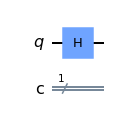

In [12]:
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qft = QuantumCircuit(q, c)

qft.h(0)
# qft.p(np.pi/2,0)
qft.draw('mpl')

In [14]:
res = execute(qft, Aer.get_backend('statevector_simulator')).result()
qft_outp = np.array(res.get_statevector(qft))
print('       QFT     ',qft_outp)
x = np.array([1., 0.])
y = np.fft.ifft(x)
print(' numpy FFT     ',y)


       QFT      [0.70710678+0.j 0.70710678+0.j]
 numpy FFT      [0.5+0.j 0.5+0.j]


**Exercise 2** (1 point). Implement the inverse quantum Fourier transformation on a single qubit. Place your solution in an object called `iqft`. 

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# Quantum phase estimation

**Exercise 3** (3 points). Phase estimation pivots on the controlled application of powers of a unitary matrix, followed by an inverse Fourier transformation. Take the $2\times 2$ unitary matrix $\begin{bmatrix}1 & 0 \\0 & i\end{bmatrix}$. This operation has two eigenvectors, $|0\rangle$ and $|1\rangle$. Implement the first part of the quantum phase estimation with two ancilla qubits: add the necessary Hadamard gates on the ancilla qubits and apply $C-U^{2^0}$ and $C-U^{2^1}$. Qubits 0 and 1 should be the ancilla, and qubit 2 contains the eigenvector -- you can assume that this is $|0\rangle$. Place your solution in an object called `qpe`. 

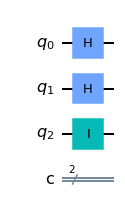

In [18]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

qpe = QuantumCircuit(q, c)
qpe.h(q[0])  # ancilla qubit |x0>
qpe.h(q[1])  # ancilla qubit |x1>
qpe.i(q[2]) # |u>
qpe.draw('mpl')


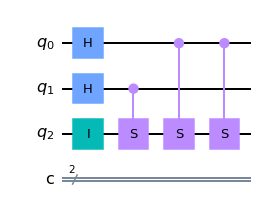

In [19]:
# Controlled-U0
qpe.cs(q[1], q[2])
# Controlled-U1
qpe.cs(q[0], q[2])
qpe.cs(q[0], q[2])

qpe.draw('mpl')

In [20]:
amplitudes = get_amplitudes(qpe)
assert np.allclose(amplitudes, np.array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]))

**Exercise 4** (1 point). Apply the same circuit to the other eigenvector. Place your solution in an object called `circuit_2`.

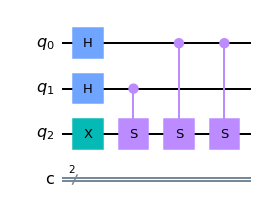

In [21]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

qpe = QuantumCircuit(q, c)
qpe.h(q[0])  # ancilla qubit |x0>
qpe.h(q[1])  # ancilla qubit |x1>
qpe.x(q[2]) # |u>   <--------------------change here

# Controlled-U0
qpe.cs(q[1], q[2])
# Controlled-U1
qpe.cs(q[0], q[2])
qpe.cs(q[0], q[2])

qpe.draw('mpl')


In [22]:
amplitudes = get_amplitudes(qpe)
assert np.allclose(amplitudes, np.array([ 0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0.5+0.j , -0.5+0.j ,
                                          0. +0.5j,  0. -0.5j]))